<a href="https://colab.research.google.com/github/ajayrajput86/Course/blob/master/Voronoi_diagram_for_geo_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the dataset
df = pd.read_excel('final_data.xlsx')

In [ ]:
df.head()

,ERBS,T_MBNL,T_EnbID,HO_ATT,HO_succ,Fail count,S_Lat,S_Long,T_Lat,T_Long,Tier ID,"1,2,3,rest"
0,AAB013BB1,INV011,438,10,10,0,56.004364,-4.737004,55.941655,-4.799791,1.0,NaN
1,AAB013BB1,WDU016,1508,72,72,0,56.004364,-4.737004,55.982516,-4.599471,1.0,NaN
2,AAB013BB1,INV010,1912,6810,6729,81,56.004364,-4.737004,55.936675,-4.757966,1.0,NaN
3,AAB013BB1,INV018,2391,4943,4911,32,56.004364,-4.737004,55.944570,-4.830375,1.0,NaN
4,AAB013BB1,INV003,2596,9395,9306,89,56.004364,-4.737004,55.949296,-4.811803,1.0,NaN


In [ ]:
# Step 2: Extract relevant columns
data = df[['ERBS', 'S_Lat', 'S_Long', 'T_MBNL', 'T_Lat', 'T_Long']]
data.head()

,ERBS,S_Lat,S_Long,T_MBNL,T_Lat,T_Long
0,AAB013BB1,56.004364,-4.737004,INV011,55.941655,-4.799791
1,AAB013BB1,56.004364,-4.737004,WDU016,55.982516,-4.599471
2,AAB013BB1,56.004364,-4.737004,INV010,55.936675,-4.757966
3,AAB013BB1,56.004364,-4.737004,INV018,55.944570,-4.830375
4,AAB013BB1,56.004364,-4.737004,INV003,55.949296,-4.811803


In [ ]:
# Step 3: Obtain the list of nodes
nodes = data['ERBS'].unique()
print(nodes)

['AAB013BB1' 'AAB015BB1' 'AAB020BB1' ... 'YOR147BB1' 'YOR148BB1'
 'YOR149BB1']


In [ ]:
# Step 4: Construct a Voronoi diagram
# Remove rows with NaN values from the dataset
data = data.dropna(subset=['S_Lat', 'S_Long'])
points = data[['S_Lat', 'S_Long']].values
vor = Voronoi(points)

In [ ]:
print(vor)

In [ ]:
# Step 5: Determine Voronoi regions
regions = {}
for idx, region_vertices in enumerate(vor.regions):
    if len(region_vertices) > 0 and -1 not in region_vertices:
        region_points = vor.vertices[region_vertices]
        distances = np.sqrt(np.sum((region_points - points[idx]) ** 2, axis=1))
        nearest_index = np.argmin(distances)
        nearest_node = nodes[nearest_index]
        regions[idx] = nearest_node

In [ ]:
# Step 6: Calculate nearest neighbors
neighbors = {}
for node in nodes:
    region_index = vor.point_region[nodes.tolist().index(node)]
    if region_index in regions:
        region_vertices = vor.regions[region_index]
        region_vertices = [v for v in region_vertices if v >= 0]
        region_points = vor.vertices[region_vertices]

        distances = np.sqrt(np.sum((region_points - points[nodes.tolist().index(node)]) ** 2, axis=1))
        nearest_index = np.where(distances == np.min(distances))[0][0]
        nearest_node = regions[region_index][nearest_index]

        neighbors[node] = nearest_node

In [ ]:
print(neighbors)

{'AAB013BB1': '0', 'AAB015BB1': '0', 'AAB020BB1': '0', 'AAB026BB1': '0', 'AAB039BB1': '0', 'AAB042BB1': '0', 'AAB043BB1': '0', 'AAB045BB1': '0', 'AAB046BB1': '0', 'AAB070BB1': '0', 'ABC018BB1': '0', 'ABC023BB1': '0', 'ABC050BB1': '0', 'ABC052BB1': '0', 'ABC060BB1': '0', 'ABS001BB1': '0', 'ABS003BB1': '0', 'ABS049BB1': '0', 'ABS062BB1': '0', 'ABS065BB1': '0', 'ABS079BB1': 'B', 'ABS100BB1': 'B', 'ABS111BB1': 'B', 'ABS135BB1': 'B', 'ABS149BB1': 'B', 'ABS175BB1': 'B', 'ADR008BB1': 'B', 'ADR014BB1': 'B', 'AFD018BB1': 'B', 'AFD035BB1': 'B', 'AFD039BB1': 'B', 'AFD046BB1': 'B', 'AFD094E': 'B', 'AFD097BB1': 'B', 'AFD099BB1': 'B', 'AFD110BB1': 'B', 'AFD111BB1': 'B', 'ALD014BB1': 'B', 'ALD027BB1': 'B', 'ALD032BB1': 'B', 'ALD052BB1': 'B', 'ALD053BB1': 'B', 'ALD056BB1': 'B', 'ALD057BB1': 'B', 'ALD059BB1': 'B', 'ALK007BB1': 'B', 'ALK013BB1': 'B', 'ALK024BB1': 'B', 'ALL008BB1': 'B', 'ALL009BB1': 'B', 'AMV003BB1': 'B', 'AMV006BB1': 'B', 'AMV032BB1': 'B', 'ANG010BB1': 'B', 'ANG024BB1': 'B', 'ANG049BB1'

In [ ]:
# Step 7: Determine first-tier neighbors
first_tier_neighbors = {}
for node, neighbor in neighbors.items():
    if neighbor not in first_tier_neighbors.values():
        first_tier_neighbors[node] = neighbor

In [ ]:
print(first_tier_neighbors)

{'AAB013BB1': '0', 'ABS079BB1': 'B', 'ANT204BB1': 'A', 'ANT254BB1': '2', 'BRT146BB1': '3', 'COV176BB1': '1', 'HSW036BB1': '6', 'NTN141BB1': '5', 'SFD121BB1': '9', 'SOX059BB1': '4'}


In [ ]:
# Step 8: Determine second-tier neighbors
second_tier_neighbors = {}
for node, neighbor in first_tier_neighbors.items():
    region_index = vor.point_region[nodes.tolist().index(node)]
    region_vertices = vor.regions[region_index]
    region_vertices = [v for v in region_vertices if v >= 0]
    region_points = vor.vertices[region_vertices]

    distances = np.sqrt(np.sum((region_points - points[nodes.tolist().index(node)]) ** 2, axis=1))
    nearest_index = np.where(distances == np.min(distances))[0][0]
    nearest_node = regions[region_index][nearest_index]

    second_tier_neighbors[node] = nearest_node

In [ ]:
print(second_tier_neighbors)

{'AAB013BB1': '0', 'ABS079BB1': 'B', 'ANT204BB1': 'A', 'ANT254BB1': '2', 'BRT146BB1': '3', 'COV176BB1': '1', 'HSW036BB1': '6', 'NTN141BB1': '5', 'SFD121BB1': '9', 'SOX059BB1': '4'}


In [ ]:
# Step 10: Add tier ID column to the dataset
data['TierID'] = 3
for node, neighbor in first_tier_neighbors.items():
    data.loc[data['ERBS'] == node, 'TierID'] = '1'
for node, neighbor in second_tier_neighbors.items():
    data.loc[data['ERBS'] == node, 'TierID'] = '2'

data.head(60)

,ERBS,S_Lat,S_Long,T_MBNL,T_Lat,T_Long,TierID
0,AAB013BB1,56.004364,-4.737004,INV011,55.941655,-4.799791,2
1,AAB013BB1,56.004364,-4.737004,WDU016,55.982516,-4.599471,2
2,AAB013BB1,56.004364,-4.737004,INV010,55.936675,-4.757966,2
3,AAB013BB1,56.004364,-4.737004,INV018,55.944570,-4.830375,2
4,AAB013BB1,56.004364,-4.737004,INV003,55.949296,-4.811803,2
5,AAB013BB1,56.004364,-4.737004,INV005,55.918353,-4.647039,2
6,AAB013BB1,56.004364,-4.737004,WDU009,55.944673,-4.529868,2
7,AAB013BB1,56.004364,-4.737004,INV008,55.927761,-4.681674,2
8,AAB013BB1,56.004364,-4.737004,AAB026,55.960380,-4.662250,2
9,AAB013BB1,56.004364,-4.737004,AAB028,56.005899,-4.742072,2


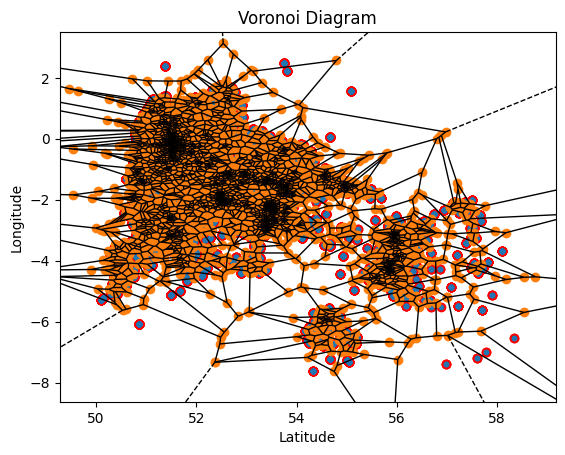

In [ ]:
# Step 10: Visualize the boundaries
voronoi_plot_2d(vor)
plt.scatter(points[:, 0], points[:, 1], c='red')
plt.title('Voronoi Diagram')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

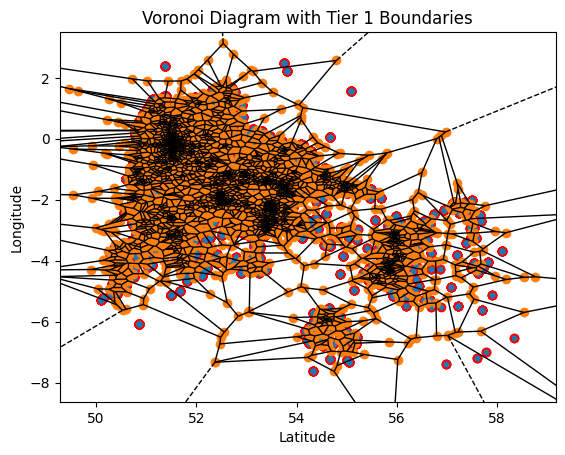

In [ ]:
# Step 10: Visualize the boundaries
voronoi_plot_2d(vor)
plt.scatter(points[:, 0], points[:, 1], c='red')

# Plotting boundaries for first-tier neighbors
for node, neighbor in first_tier_neighbors.items():
    node_index = nodes.tolist().index(node)
    if neighbor in nodes:
        neighbor_index = nodes.tolist().index(neighbor)
        plt.plot([points[node_index, 0], points[neighbor_index, 0]], [points[node_index, 1], points[neighbor_index, 1]], 'g--')

plt.title('Voronoi Diagram with Tier 1 Boundaries')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
